In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# custum logistic regression
class LogisticRegression:
    '''
    Custom Logistic Regression
    '''
    def __init__(self):
        self.W = None
        self.b = None

    def init_params(self, W=None, b=None):
        if W is not None: 
            self.W = W
        if b is not None: 
            self.b = b

    def activation(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y, lr=0.1, epochs=10):
        N, D = X.shape
        
        # initialize weights if not already
        if self.W is None:
            self.init_params(np.random.randn(D), None)
        
        if self.b is None:
            self.init_params(None, 0)
        
        # gradient descent
        for i in range(epochs):
            # forward pass
            z = X.dot(self.W) + self.b
            z = self.activation(z)
            # loss
            loss = -np.mean(y*np.log(z) + (1-y)*np.log(1-z))
            
            print(f'Epoch {i+1}/{epochs}, loss: {loss}')
            
            # backward pass
            self.W -= 1/N * lr * X.T.dot(z-y)
            self.b -= 1/N * lr * np.sum(z-y)

    def predict(self, X):
        z = self.activation(X.dot(self.W) + self.b)
        return z

In [3]:
# creating dataset

X_train = np.array([
    [0.346, 0.780],
    [0.303, 0.439],
    [0.358, 0.729],
    [0.602, 0.863],
    [0.790, 0.753],
    [0.611, 0.965]
])

y_train = np.array([0, 0, 0, 1, 1, 1])

X_test = np.array([
    [0.959, 0.382],
    [0.750, 0.306],
    [0.395, 0.760],
    [0.823, 0.764],
    [0.761, 0.874],
    [0.844, 0.435]
])

y_test = np.array([0, 0, 0, 1, 1, 1])

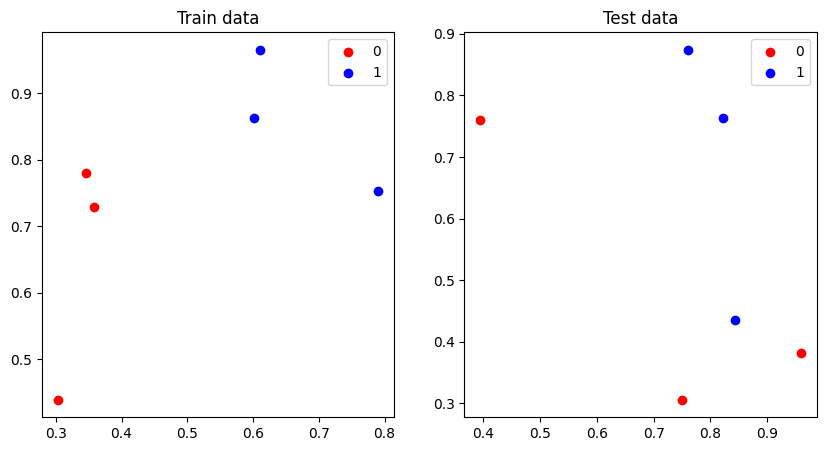

In [4]:
# plot data side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='r', label='0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='b', label='1')
plt.title('Train data')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='r', label='0')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='b', label='1')
plt.title('Test data')
plt.legend()

plt.show()

## Que5(b) (ii)

In [5]:
# model initialization
model = LogisticRegression()
model.init_params(np.array([1.5, 0.5]), -1.0)

# train model
model.fit(X_train, y_train, lr=0.1, epochs=1)

# print model weights
print(f'Model weights after one iteration W: {model.W}, b: {model.b}')

Epoch 1/1, loss: 0.5569500797547652
Model weights after one iteration W: [1.50535086 0.50196867], b: -1.0031662597725644


## Que 5 (b) (ii)

In [6]:
# model initialization
model = LogisticRegression()
model.init_params(np.array([1.5, 0.5]), -1.0)

# train model
model.fit(X_train, y_train, lr=0.1, epochs=1000)

Epoch 1/1000, loss: 0.5569500797547652
Epoch 2/1000, loss: 0.5565250322222676
Epoch 3/1000, loss: 0.5561010723732475
Epoch 4/1000, loss: 0.5556781510288636
Epoch 5/1000, loss: 0.5552562232679722
Epoch 6/1000, loss: 0.5548352480512786
Epoch 7/1000, loss: 0.5544151878788122
Epoch 8/1000, loss: 0.5539960084777558
Epoch 9/1000, loss: 0.5535776785179282
Epoch 10/1000, loss: 0.5531601693524549
Epoch 11/1000, loss: 0.5527434547813901
Epoch 12/1000, loss: 0.5523275108362459
Epoch 13/1000, loss: 0.5519123155835741
Epoch 14/1000, loss: 0.5514978489459058
Epoch 15/1000, loss: 0.5510840925385101
Epoch 16/1000, loss: 0.5506710295205662
Epoch 17/1000, loss: 0.5502586444594738
Epoch 18/1000, loss: 0.5498469232071347
Epoch 19/1000, loss: 0.549435852787146
Epoch 20/1000, loss: 0.5490254212919393
Epoch 21/1000, loss: 0.5486156177889854
Epoch 22/1000, loss: 0.5482064322352621
Epoch 23/1000, loss: 0.5477978553992543
Epoch 24/1000, loss: 0.5473898787898215
Epoch 25/1000, loss: 0.5469824945913268
Epoch 26/1

In [7]:
# predict
y_pred = model.predict(X_test)
y_pred = y_pred > 0.5
print(f'Predictions: {y_pred}')

# accuracy, precision, recall
accuracy = np.mean(y_pred == y_test)
precision = np.sum(y_pred[y_test == 1]) / np.sum(y_pred)
recall = np.sum(y_pred[y_test == 1]) / np.sum(y_test)

print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}')

Predictions: [ True  True False  True  True  True]
Accuracy: 0.6666666666666666, Precision: 0.6, Recall: 1.0


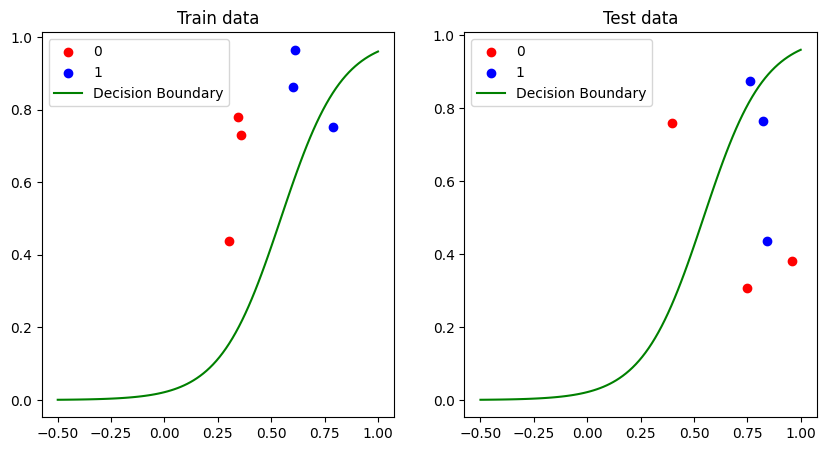

In [8]:
# plot decision boundary 
x1 = np.linspace(-0.5, 1, 100)
x_hat = model.predict(np.array([x1, x1]).T)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='r', label='0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='b', label='1')
plt.plot(x1, x_hat, color='g', label='Decision Boundary')
plt.title('Train data')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='r', label='0')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='b', label='1')
plt.plot(x1, x_hat, color='g', label='Decision Boundary')
plt.title('Test data')
plt.legend()
plt.show()